## Load test dataset and model

In [1]:
import pandas as pd
import pickle
from sklearn import set_config

# Set transformer output to be a pandas DataFrame instead of numpy array
set_config(transform_output = "pandas")

df = pd.read_csv("test.csv")
X_test, y_test = df.drop(["Transported"], axis=1), df['Transported']

with open("best_model.pkl", "rb") as f:
    model_pipeline = pickle.load(f)
    
X_test = model_pipeline['feature_engineering'].transform(X_test)

model = model_pipeline['model']

In [2]:
X_test

,onehot_encoding__HomePlanet_Earth,onehot_encoding__HomePlanet_Europa,onehot_encoding__HomePlanet_Mars,onehot_encoding__CryoSleep_False,onehot_encoding__CryoSleep_True,onehot_encoding__Destination_55 Cancri e,onehot_encoding__Destination_PSO J318.5-22,onehot_encoding__Destination_TRAPPIST-1e,onehot_encoding__VIP_False,onehot_encoding__VIP_True,...,onehot_encoding__Deck_TRAPPIST-1e,onehot_encoding__Side_P,onehot_encoding__Side_S,onehot_encoding__Side_TRAPPIST-1e,minmax_scaling__Age,minmax_scaling__RoomService,minmax_scaling__FoodCourt,minmax_scaling__ShoppingMall,minmax_scaling__Spa,minmax_scaling__VRDeck
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.240506,0.029106,0.012589,0.059225,0.000134,0.043799
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.227848,0.000279,0.032608,0.000000,0.000000,0.000041
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.518987,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.443038,0.000000,0.012192,0.040729,0.000000,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.544304,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.303797,0.000000,0.000000,0.000000,0.000000,0.000000
1300,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1301,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.063291,0.000000,0.000000,0.000000,0.000000,0.000000
1302,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.708861,0.047393,0.040616,0.000000,0.001473,0.133842


## Evaluate Model

In [3]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, roc_auc_score

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, normalize = 'true')

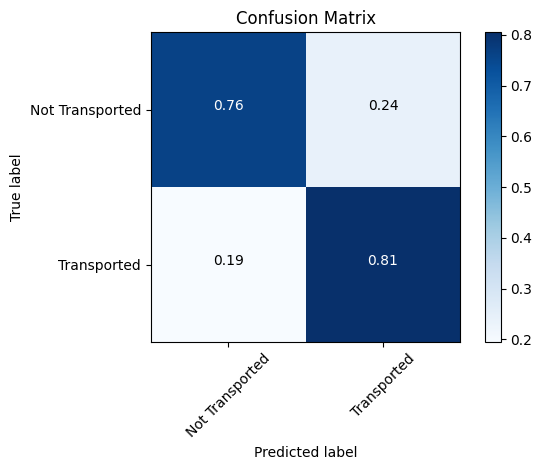

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Not Transported', 'Transported']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(np.round(cm[i, j], 2)),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

confusion_matrix_plot = plt.gcf()

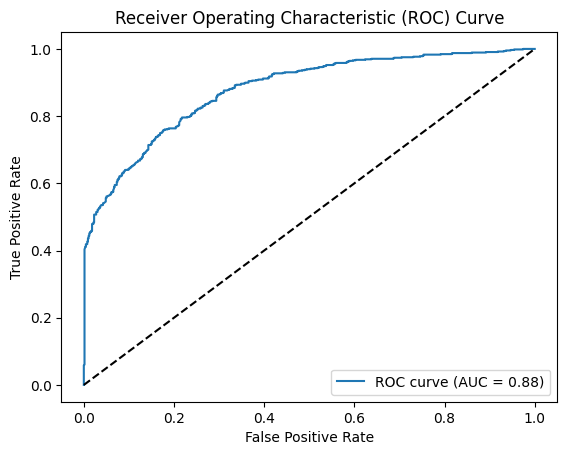

In [5]:
y_pred_probs = model.predict_proba(X_test)[:,1]
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_probs)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

roc_auc_plot = plt.gcf()


## Interpret model

In [6]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Create a SHAP Tree Explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the chosen sample
shap_values = explainer.shap_values(X_test)

C:\Users\p.adeikalam\.conda\envs\test-workshop\lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


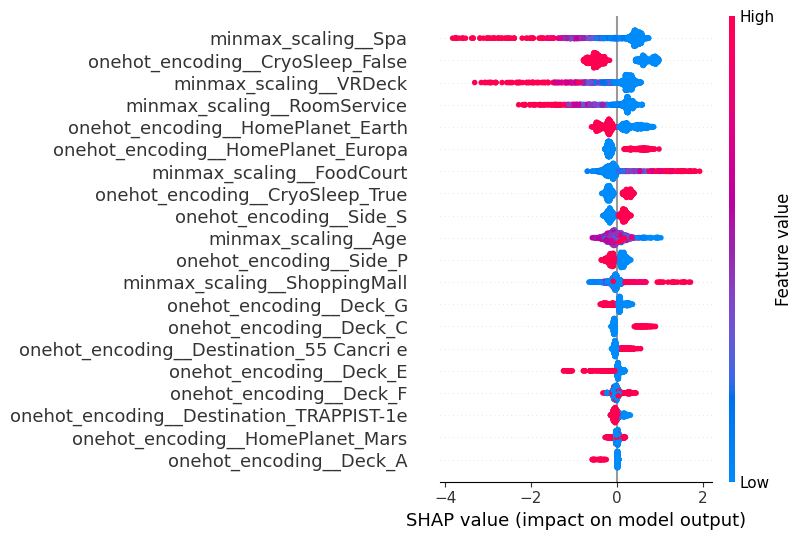

In [7]:
shap.summary_plot(shap_values, X_test, show=False, plot_size = 0.2)

summary_plot = plt.gcf()
#fig.set_size_inches(9,16)

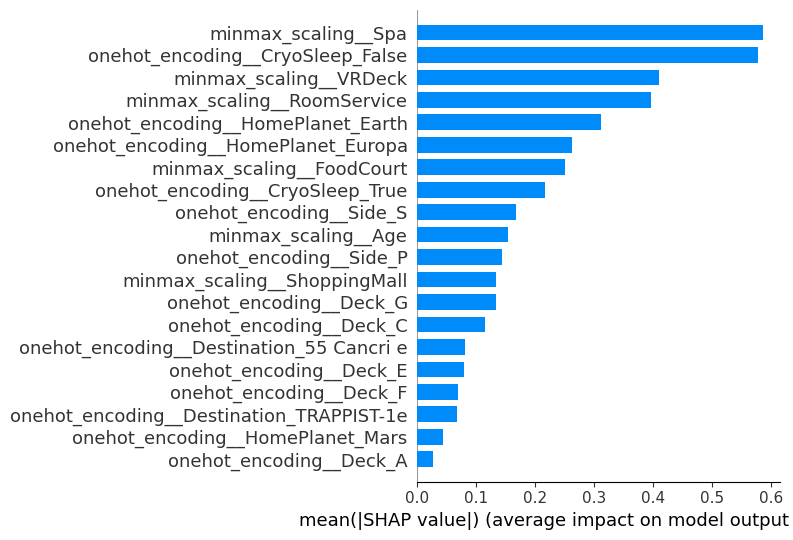

In [8]:
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False, plot_size = 0.2)

feature_importance_plot = plt.gcf()